#Step by Step Klasfikasi Tomat

Di Notebook ini, kita akan membuat proyek machine learning classification dengan dataset tomat menggunakan algoritma LogisticRegression + StandardScaler.

Alur kerja :

1. load dataset
2. visualisasi data
3. pembuatan model machine learning clssification
4. tes prediksi data baru
5. simpan model ke dalam bentuk joblib


In [3]:
import pandas as pd
df=pd.read_csv("dataset_tomat.csv")
df

,berat,kekenyalan,kadar_gula,tebal_kulit,grade
0,95,8.5,4.8,0.85,Ekspor
1,88,9.2,5.1,0.90,Ekspor
2,102,8.8,4.9,0.82,Ekspor
3,110,8.1,4.6,0.88,Ekspor
4,92,9.0,5.0,0.87,Ekspor
...,...,...,...,...,...
85,180,4.2,3.0,0.57,Industri
86,208,3.4,2.8,0.53,Industri
87,172,4.7,3.2,0.59,Industri
88,188,4.0,2.9,0.56,Industri


In [4]:
df.head(2)

,berat,kekenyalan,kadar_gula,tebal_kulit,grade
0,95,8.5,4.8,0.85,Ekspor
1,88,9.2,5.1,0.90,Ekspor


In [6]:
df.tail(2)

,berat,kekenyalan,kadar_gula,tebal_kulit,grade
88,188,4.0,2.9,0.56,Industri
89,198,3.6,2.6,0.54,Industri


In [8]:
df.columns

Index(['berat', 'kekenyalan', 'kadar_gula', 'tebal_kulit', 'grade'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   berat        90 non-null     int64  
 1   kekenyalan   90 non-null     float64
 2   kadar_gula   90 non-null     float64
 3   tebal_kulit  90 non-null     float64
 4   grade        90 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 3.6+ KB


In [13]:
df.describe()

,berat,kekenyalan,kadar_gula,tebal_kulit
count,90.000000,90.000000,90.000000,90.000000
mean,142.388889,6.547778,3.956667,0.721778
std,37.919398,1.933456,0.785265,0.126461
min,85.000000,3.400000,2.600000,0.510000
25%,104.250000,4.525000,3.225000,0.592500
50%,143.000000,6.850000,4.000000,0.730000
75%,175.500000,8.375000,4.700000,0.847500
max,210.000000,9.400000,5.200000,0.920000


In [15]:
df["grade"].value_counts()

grade
Ekspor           30
Lokal Premium    30
Industri         30
Name: count, dtype: int64

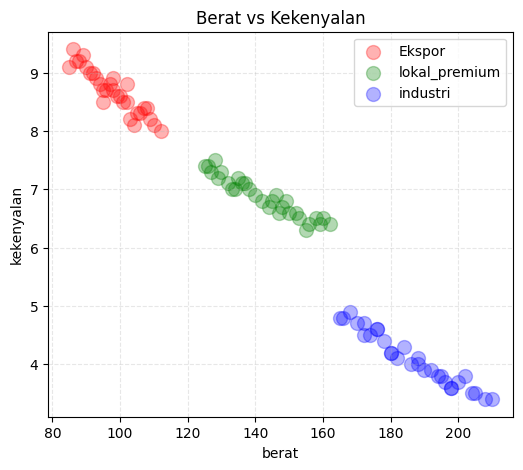

In [41]:
import matplotlib.pyplot as plt
ekspor=df[df["grade"]=="Ekspor"]
lokal_premium=df[df["grade"]=="Lokal Premium"]
industri=df[df["grade"]=="Industri"]
plt.figure(figsize=(6,5))
plt.scatter(ekspor["berat"],ekspor["kekenyalan"],s=100,alpha=0.3,color="red",label="Ekspor")
plt.scatter(lokal_premium["berat"],lokal_premium["kekenyalan"],s=100,alpha=0.3,color="green",label="lokal_premium")
plt.scatter(industri["berat"],industri["kekenyalan"],s=100,alpha=0.3,color="blue",label="industri")
plt.xlabel("berat")
plt.ylabel("kekenyalan")
plt.title("Berat vs Kekenyalan")
plt.legend()
plt.grid(True,linestyle="--",alpha=0.3)
plt.show()

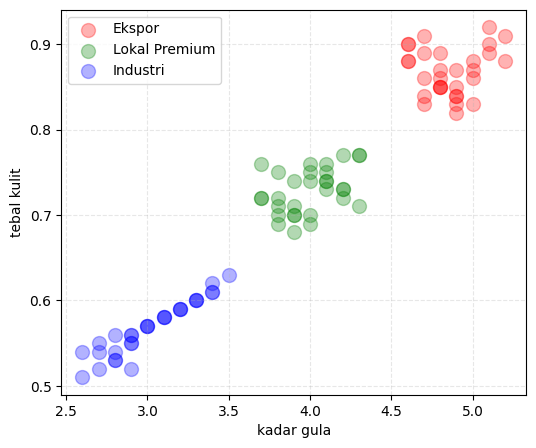

In [53]:
import matplotlib.pyplot as plt
ekspor=df[df["grade"]=="Ekspor"]
lokal_premium=df[df["grade"]=="Lokal Premium"]
industri=df[df["grade"]=="Industri"]
plt.figure(figsize=(6,5))
plt.scatter(ekspor["kadar_gula"],ekspor["tebal_kulit"],s=100,alpha=0.3,color="red",label="Ekspor")
plt.scatter(lokal_premium["kadar_gula"],lokal_premium["tebal_kulit"],s=100,alpha=0.3,color="green",label="Lokal Premium")
plt.scatter(industri["kadar_gula"],industri["tebal_kulit"],s=100,alpha=0.3,color="blue",label="Industri")
plt.xlabel("kadar gula")
plt.ylabel("tebal kulit")
plt.legend()
plt.grid(True,linestyle="--",alpha=0.3)
plt.show()

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
X=df[["berat","kekenyalan","kadar_gula","tebal_kulit"]]
y=df["grade"]
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
#buat otak baru
model=LogisticRegression()
#suruh otak belajar
model.fit(X_train_scaled,y_train)
#mengerjakan test, simpan jawaban di y_pred
y_pred=model.predict(X_test_scaled)
#cek kunci jawaban
print("Akurasi :",accuracy_score(y_test,y_pred))

Akurasi : 1.0


In [71]:
data_baru=pd.DataFrame([[80,8,4,0.8]],columns=["berat","kekenyalan","kadar_gula","tebal_kulit"])
data_baru_scaled=scaler.transform(data_baru)
model.predict(data_baru_scaled)[0]
print(model.classes_)
print(model.predict_proba(data_baru_scaled)[0])
print("------")
prediksi=model.predict(data_baru_scaled)[0]
presentase=max(model.predict_proba(data_baru_scaled)[0])
print(f"model memprediksi {prediksi} dengan tingkat keyakinan {presentase*100:.2f}%")

['Ekspor' 'Industri' 'Lokal Premium']
[0.71709205 0.00089314 0.28201482]
------
model memprediksi Ekspor dengan tingkat keyakinan 71.71%


In [72]:
import joblib
joblib.dump(model,"model_klasifikasi_tomat.joblib")
joblib.dump(scaler,"scaler_klasifikasi_tomat.joblib")

['scaler_klasifikasi_tomat.joblib']